In [1]:
import shap
import pickle
from transformers import AutoTokenizer
import numpy as np
import transformers
import shap
from src.plot_text import text
from src.utils import format_fts_for_plotting


/home/james/CodingProjects/TextNTabularExplanations/env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
with open('../shap_vals_ensemble_75.pkl', 'rb') as f:
    shap_vals = pickle.load(f)
num_tab_fts = 7

## Text plot (with linebreak)

In [8]:
shap_vals[idx].clustering


array([[ 2.        ,  5.        ,  0.3821844 ,  2.        ],
       [ 3.        ,  4.        ,  0.44282867,  2.        ],
       [ 1.        , 36.        ,  0.75483054,  3.        ],
       [35.        , 37.        ,  0.87908429,  5.        ],
       [ 6.        , 38.        ,  1.26705325,  6.        ],
       [ 0.        , 39.        ,  1.4137034 ,  7.        ],
       [ 9.        , 10.        ,  0.07142857,  2.        ],
       [17.        , 18.        ,  0.07142857,  2.        ],
       [42.        , 19.        ,  0.10714286,  3.        ],
       [ 7.        ,  8.        ,  0.07142857,  2.        ],
       [11.        , 12.        ,  0.07142857,  2.        ],
       [13.        , 14.        ,  0.07142857,  2.        ],
       [15.        , 16.        ,  0.07142857,  2.        ],
       [20.        , 21.        ,  0.07142857,  2.        ],
       [22.        , 23.        ,  0.07142857,  2.        ],
       [26.        , 27.        ,  0.07142857,  2.        ],
       [28.        , 29.

In [14]:
idx = 0
formatted_data = np.array(
    format_fts_for_plotting(
        shap_vals[0].feature_names, shap_vals[idx].data[:num_tab_fts])
)
text(
    shap.Explanation(
        values=shap_vals[idx].values,
        base_values=shap_vals[idx].base_values,
        data=formatted_data,
        clustering=shap_vals[idx].clustering,
        output_names=["Genre is not Drama", "Genre is Drama"],
        hierarchical_values=shap_vals[idx].hierarchical_values,
    ),
    # grouping_threshold=20,
    linebreak_after_idxs=num_tab_fts,  # linebreak_after_idx,
)

## Summed text vals in waterfall plot

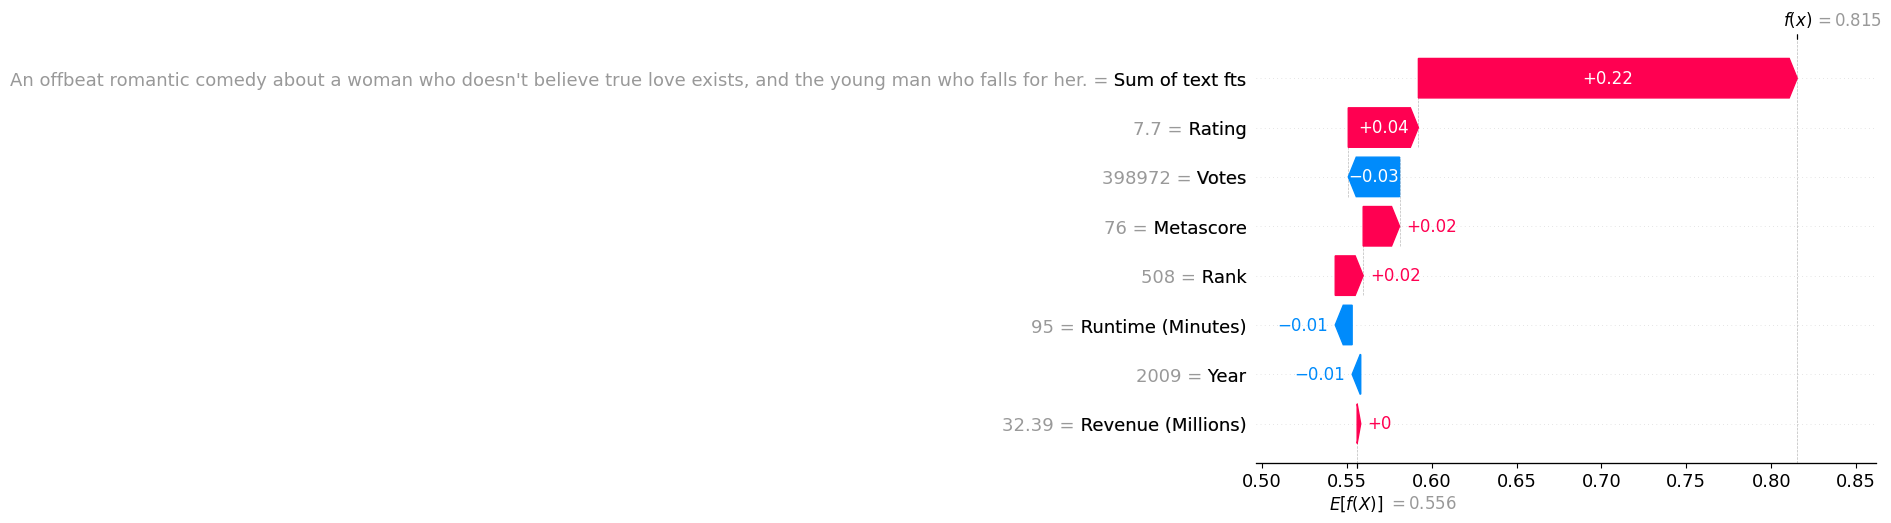

In [6]:
label = 1


shap.waterfall_plot(
    shap.Explanation(
        values=np.append(shap_vals[idx, :num_tab_fts, label].values, np.sum(
            shap_vals[idx, num_tab_fts:, label].values)),
        base_values=shap_vals[idx, :, label].base_values,
        data=shap_vals[idx, :, label].data,
        feature_names=shap_vals[idx, :num_tab_fts,
                                label].feature_names + ['Sum of text fts'],
    )
)